<a href="https://colab.research.google.com/github/sreekanthTa/ChurnPrediction/blob/main/Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn   as sns

In [2]:
data = pd.read_csv("/content/sample_data/Telco Customer Churn Data.csv")
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
encode_columns = [
    "gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
    "DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod",
    ]

In [4]:
len(encode_columns)

15

In [5]:
data.shape

(7043, 21)

In [6]:
one_hot_encoded=pd.get_dummies(data, columns=encode_columns, drop_first=True)
one_hot_encoded.shape
one_hot_encoded.head(5)

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,29.85,29.85,No,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
1,5575-GNVDE,0,34,56.95,1889.5,No,True,False,False,True,...,False,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,0,2,53.85,108.15,Yes,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
3,7795-CFOCW,0,45,42.30,1840.75,No,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,9237-HQITU,0,2,70.70,151.65,Yes,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False


In [ ]:
# concated_data = pd.concat([data, one_hot_encoded], axis=1)
# concated_data.shape
# concated_data.head(5)

In [7]:
# encoded_data = one_hot_encoded.drop(columns=encode_columns, axis=1)
one_hot_encoded = one_hot_encoded.drop(columns="customerID", axis=1)
one_hot_encoded.shape

(7043, 31)

In [8]:
one_hot_encoded.head(4)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,No,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.5,No,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,Yes,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,No,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False


In [9]:
yes_no_columns = ['Churn']
for col in yes_no_columns:
    one_hot_encoded[col] = one_hot_encoded[col].map({'Yes': True, 'No': False})

In [10]:
one_hot_encoded['TotalCharges'] = pd.to_numeric(one_hot_encoded['TotalCharges'],errors='coerce')

In [11]:
for col in one_hot_encoded.columns:
  print(col,one_hot_encoded[col].dtype)

SeniorCitizen int64
tenure int64
MonthlyCharges float64
TotalCharges float64
Churn bool
gender_Male bool
Partner_Yes bool
Dependents_Yes bool
PhoneService_Yes bool
MultipleLines_No phone service bool
MultipleLines_Yes bool
InternetService_Fiber optic bool
InternetService_No bool
OnlineSecurity_No internet service bool
OnlineSecurity_Yes bool
OnlineBackup_No internet service bool
OnlineBackup_Yes bool
DeviceProtection_No internet service bool
DeviceProtection_Yes bool
TechSupport_No internet service bool
TechSupport_Yes bool
StreamingTV_No internet service bool
StreamingTV_Yes bool
StreamingMovies_No internet service bool
StreamingMovies_Yes bool
Contract_One year bool
Contract_Two year bool
PaperlessBilling_Yes bool
PaymentMethod_Credit card (automatic) bool
PaymentMethod_Electronic check bool
PaymentMethod_Mailed check bool


In [12]:
one_hot_encoded.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,True,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,False,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [13]:
one_hot_encoded['TotalCharges'] = one_hot_encoded['TotalCharges'].fillna(0)

In [14]:
one_hot_encoded.isnull().sum()

SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMo

In [15]:
one_hot_encoded.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.016567,0.220173,0.103006,0.150889,-0.001874,0.016479,-0.211185,0.008576,-0.008576,...,-0.182742,0.105378,-0.182742,0.120176,-0.046262,-0.117000,0.156530,-0.024135,0.171718,-0.153477
tenure,0.016567,1.000000,0.247900,0.826178,-0.352229,0.005106,0.379697,0.159712,0.008448,-0.008448,...,-0.039062,0.279756,-0.039062,0.286111,0.202570,0.558533,0.006152,0.233006,-0.208363,-0.233852
MonthlyCharges,0.220173,0.247900,1.000000,0.651174,0.193356,-0.014569,0.096848,-0.113890,0.247398,-0.247398,...,-0.763557,0.629603,-0.763557,0.627429,0.004904,-0.074681,0.352150,0.030550,0.271625,-0.377437
TotalCharges,0.103006,0.826178,0.651174,1.000000,-0.198324,-0.000080,0.317504,0.062078,0.113214,-0.113214,...,-0.375223,0.514973,-0.375223,0.520122,0.170814,0.354481,0.158574,0.182915,-0.059246,-0.295758
Churn,0.150889,-0.352229,0.193356,-0.198324,1.000000,-0.008612,-0.150448,-0.164221,0.011942,-0.011942,...,-0.227890,0.063228,-0.227890,0.061382,-0.177820,-0.302253,0.191825,-0.134302,0.301919,-0.091683
gender_Male,-0.001874,0.005106,-0.014569,-0.000080,-0.008612,1.000000,-0.001808,0.010517,-0.006488,0.006488,...,0.006026,-0.008393,0.006026,-0.010487,0.008026,-0.003695,-0.011754,0.001215,0.000752,0.013744
Partner_Yes,0.016479,0.379697,0.096848,0.317504,-0.150448,-0.001808,1.000000,0.452676,0.017706,-0.017706,...,0.000615,0.124666,0.000615,0.117412,0.082783,0.248091,-0.014877,0.082029,-0.083852,-0.095125
Dependents_Yes,-0.211185,0.159712,-0.113890,0.062078,-0.164221,0.010517,0.452676,1.000000,-0.001762,0.001762,...,0.139812,-0.016558,0.139812,-0.039741,0.068368,0.204613,-0.111377,0.060267,-0.150642,0.059071
PhoneService_Yes,0.008576,0.008448,0.247398,0.113214,0.011942,-0.006488,0.017706,-0.001762,1.000000,-1.000000,...,0.172209,-0.022574,0.172209,-0.032959,-0.002791,0.003519,0.016505,-0.007721,0.003062,-0.003319
MultipleLines_No phone service,-0.008576,-0.008448,-0.247398,-0.113214,-0.011942,0.006488,-0.017706,0.001762,-1.000000,1.000000,...,-0.172209,0.022574,-0.172209,0.032959,0.002791,-0.003519,-0.016505,0.007721,-0.003062,0.003319


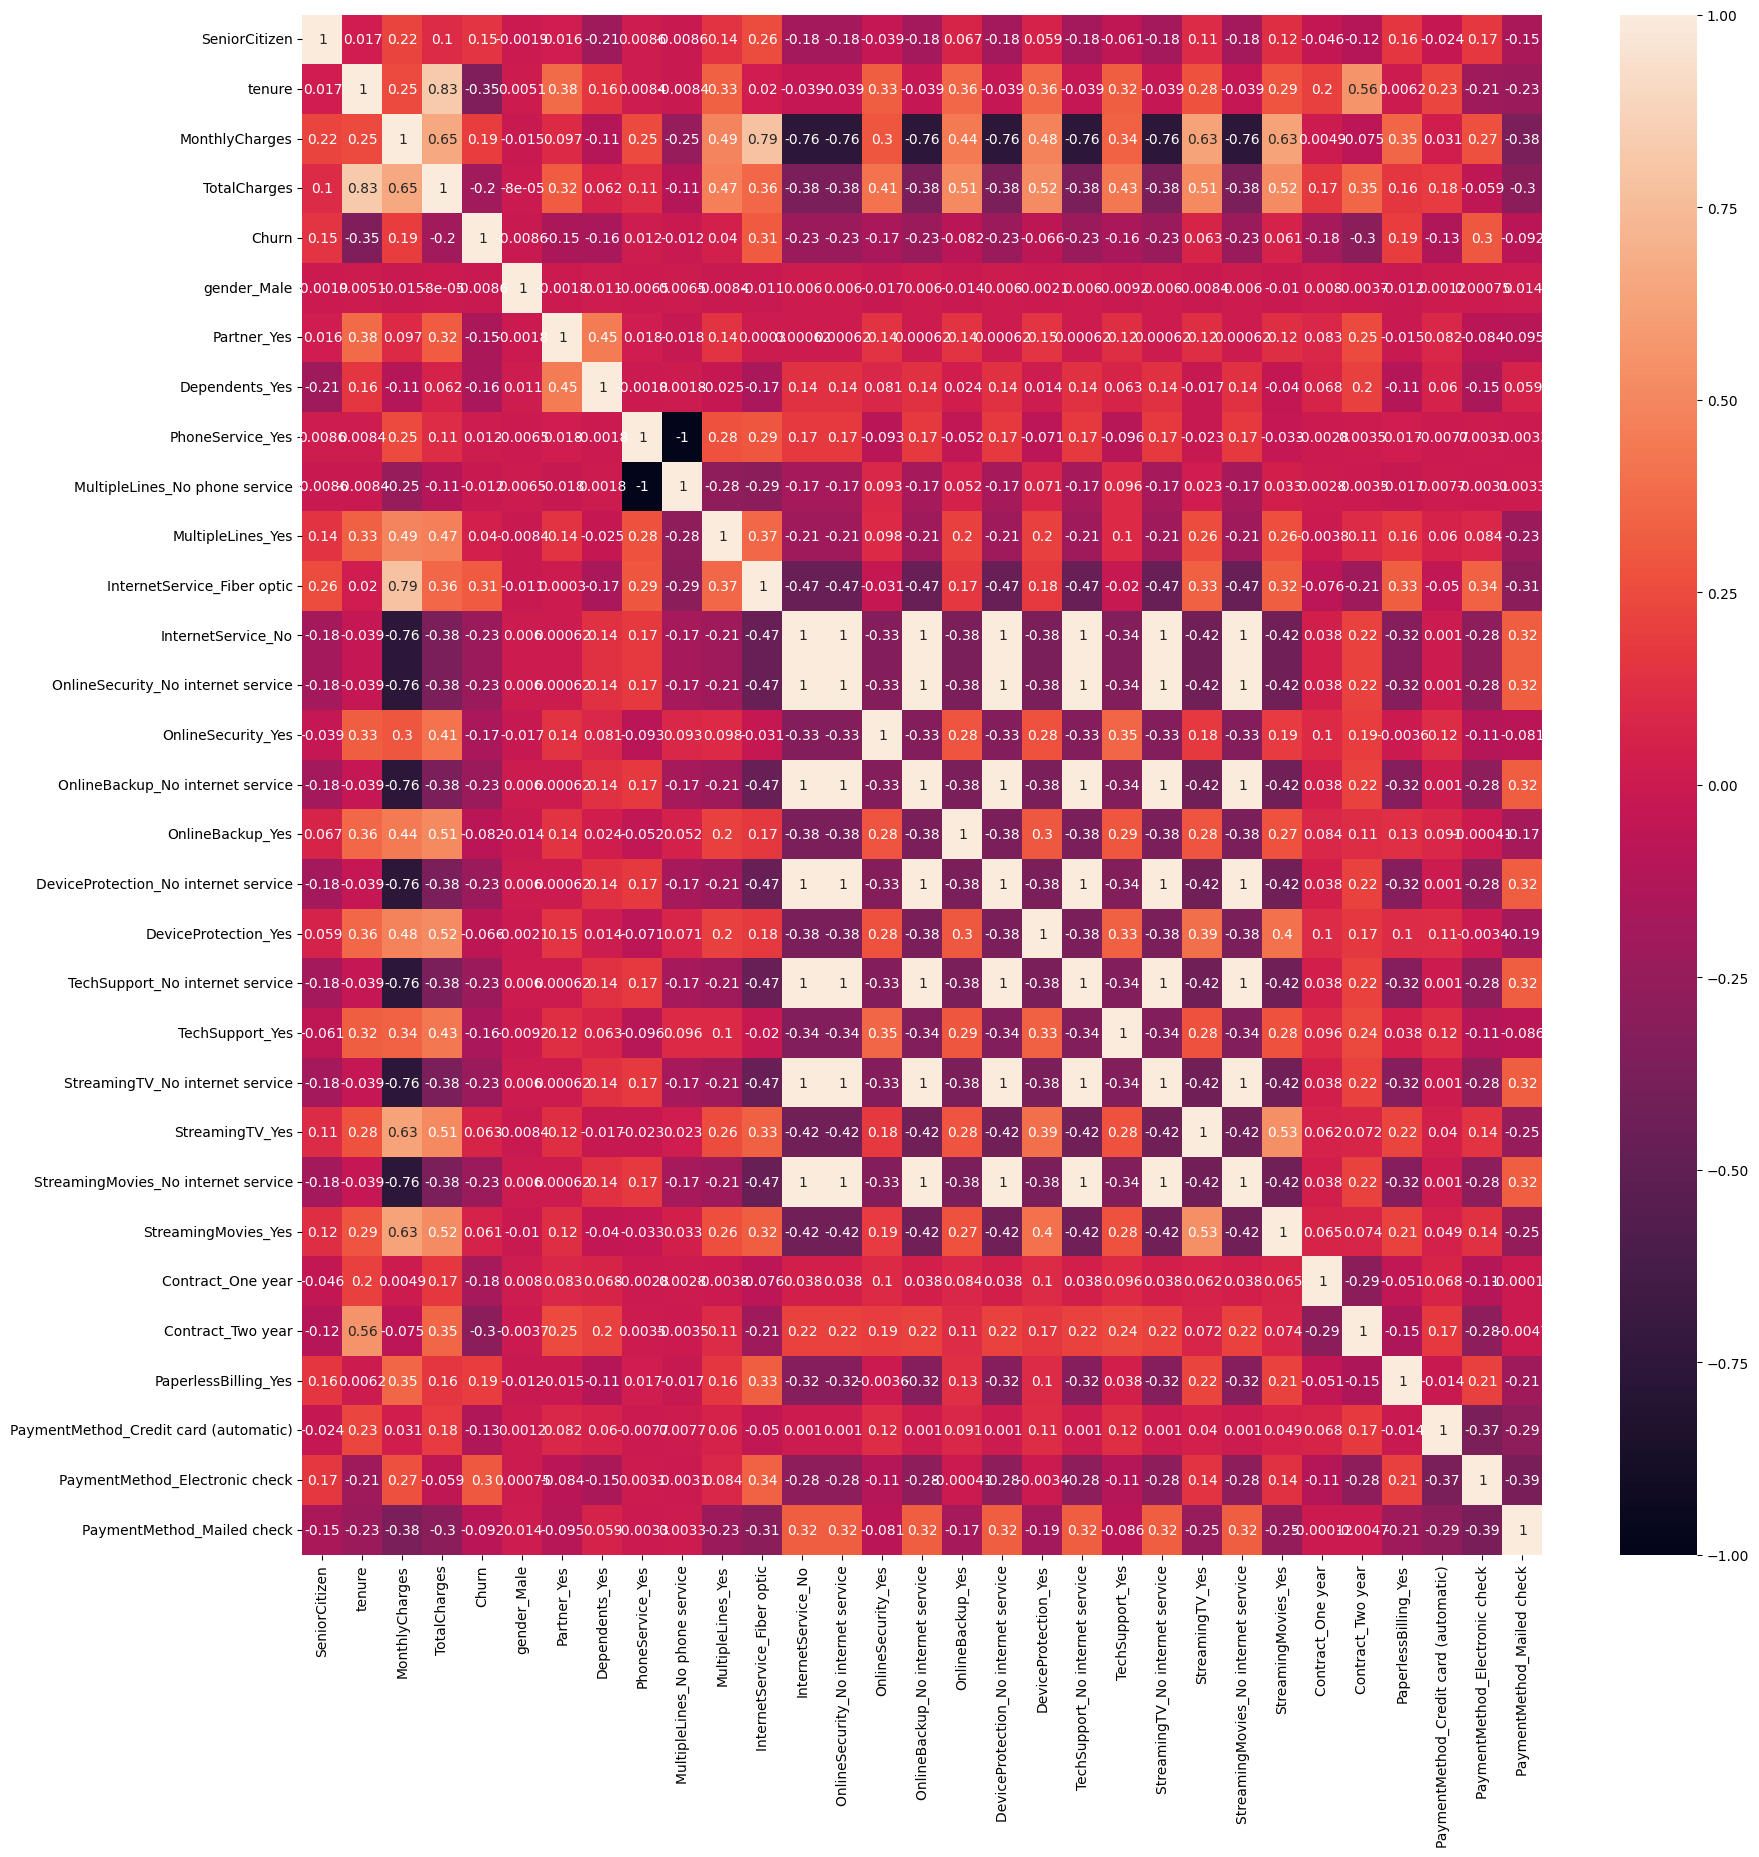

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(one_hot_encoded.corr(), annot=True)
plt.show()

In [17]:
one_hot_encoded.shape

one_hot_encoded.head(4)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,True,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,False,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False


In [18]:

# Calculate the correlation matrix
corr_matrix = one_hot_encoded.corr().abs()

# Create an upper triangle matrix
upper_matrix = corr_matrix.where(~np.tril(np.ones(corr_matrix.shape)).astype(bool))

# Define the correlation threshold
threshold = 0.9

# Find columns with correlation greater than the threshold
to_drop = [column for column in upper_matrix.columns if any(upper_matrix[column] > threshold)]

# Drop the identified columns from the DataFrame
one_hot_encoded = one_hot_encoded.drop(columns=to_drop)

print("Columns to drop (correlation > 0.9):", to_drop)
print("Reduced DataFrame:")
print(one_hot_encoded)

Columns to drop (correlation > 0.9): ['MultipleLines_No phone service', 'OnlineSecurity_No internet service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service']
Reduced DataFrame:
      SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Male  \
0                 0       1           29.85         29.85  False        False   
1                 0      34           56.95       1889.50  False         True   
2                 0       2           53.85        108.15   True         True   
3                 0      45           42.30       1840.75  False         True   
4                 0       2           70.70        151.65   True        False   
...             ...     ...             ...           ...    ...          ...   
7038              0      24           84.80       1990.50  False         True   
7039              0      72          1

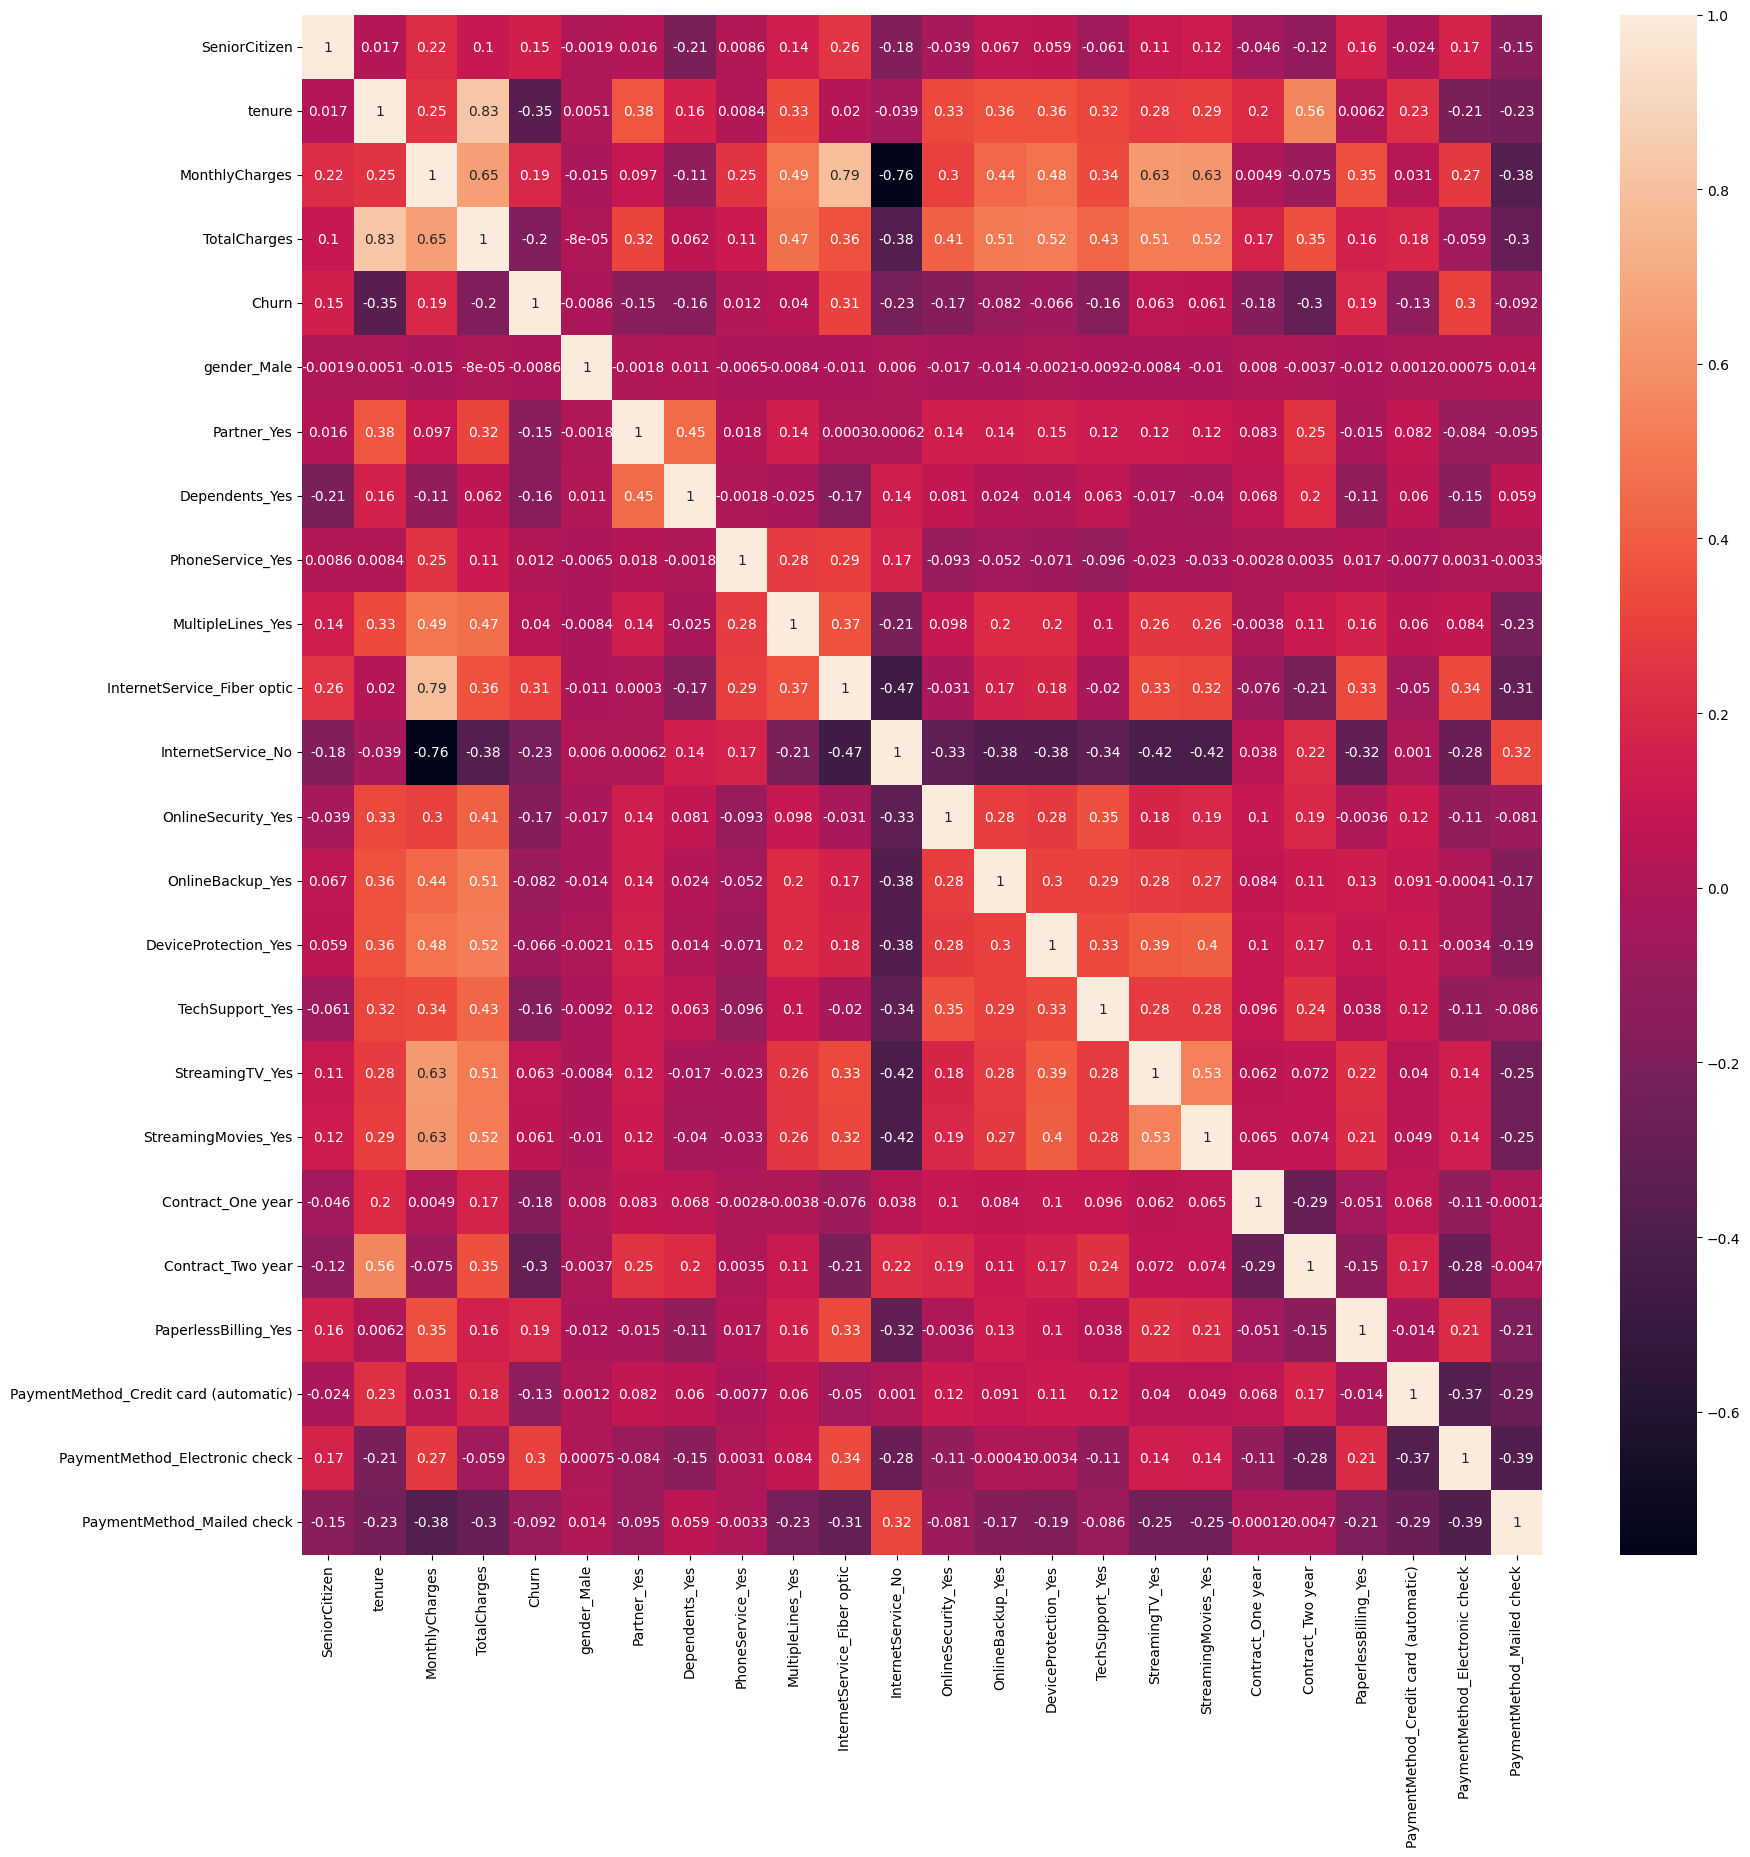

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(one_hot_encoded.corr(), annot=True)
plt.show()

In [20]:
one_hot_encoded.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [21]:
one_hot_encoded.shape

(7043, 24)

Chi Square

In [ ]:
# chi_X = one_hot_encoded.drop(columns=["Churn"], axis=1)
# chi_Y = one_hot_encoded["Churn"]

In [ ]:
# from sklearn.feature_selection import chi2
# from sklearn.feature_selection import SelectKBest

# chi2_selector = SelectKBest(chi2, k=15)
# chi2_selector.fit(chi_X, chi_Y)
# chi_best_ = chi2_selector.transform(chi_X)

# chi_best_


Variance Threshold

In [ ]:
# from sklearn.feature_selection import VarianceThreshold

# variance_threshold = VarianceThreshold(threshold=0.2)

# high_variance = variance_threshold.fit_transform(chi_X)

# high_variance

Recursive Feature Eel

In [ ]:
# from sklearn.feature_selection import RFE
# from sklearn.ensemble import RandomForestClassifier

# random_forest_classifier_model = RandomForestClassifier()
# rfe = RFE(random_forest_classifier_model, n_features_to_select=10)
# selected_features = rfe.fit_transform(chi_X, chi_Y)
# selected_features

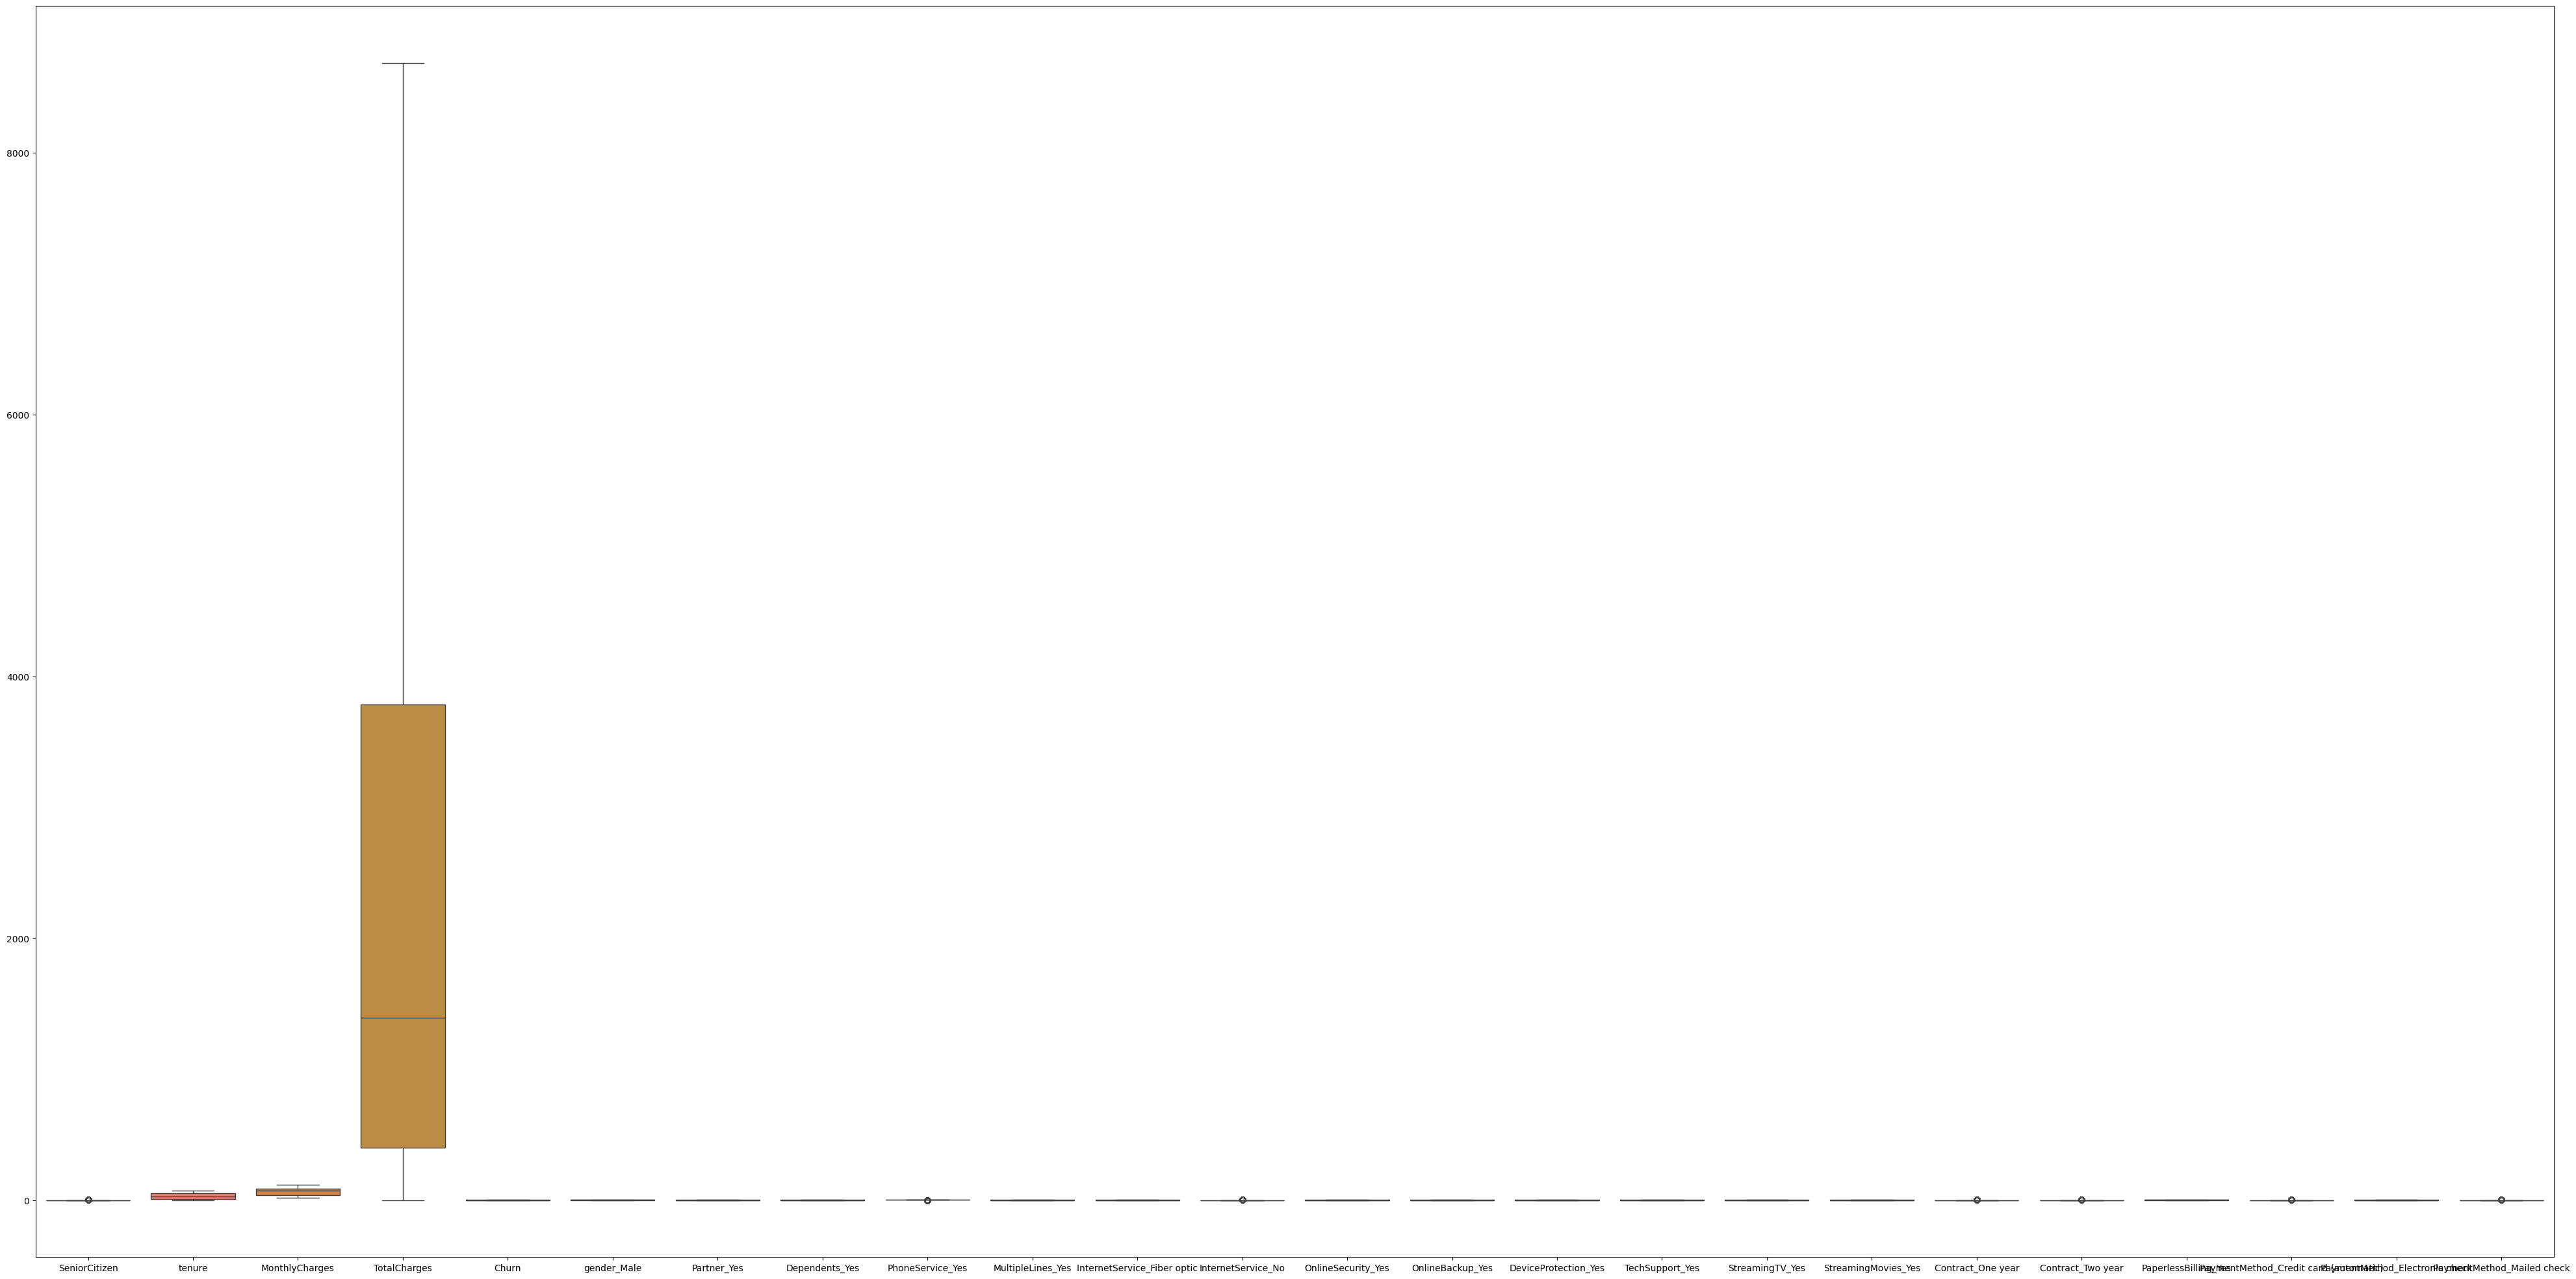

In [22]:
plt.figure(figsize=(50,25))
sns.boxplot(data=one_hot_encoded)
plt.show()

In [23]:
one_hot_encoded.shape

(7043, 24)

In [24]:
type(one_hot_encoded)

pandas.core.frame.DataFrame

In [25]:
one_hot_encoded.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,False,True,False,False,True,False,...,True,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,True,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,False,True,False,False,False,False,...,True,True,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [ ]:
# data_columns = one_hot_encoded.select_dtypes(include=[np.number])

# data_columns.head(5)

In [ ]:
# Q1 = data_columns.quantile(0.25)

# Q3 = data_columns.quantile(0.75)

# IQR = Q3 - Q1

# lower_whisker = Q1 - 1.5 * IQR

# upper_whisker = Q3 + 1.5 * IQR

# outliers = data_columns[(data_columns > lower_whisker) & (data_columns < upper_whisker)]

# outliers

In [26]:
X = one_hot_encoded.drop(columns=["Churn"])

Y = one_hot_encoded["Churn"]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(X)

scaled_data_frame = pd.DataFrame(data=scaled_data, columns = X.columns)

com_scaled_data_frame = pd.concat([scaled_data_frame, Y], axis=1)

com_scaled_data_frame.head(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,-0.439916,-1.277445,-1.160323,-0.992611,-1.009559,1.034530,-0.654012,-3.054010,-0.854176,-0.885660,...,-0.639439,-0.790132,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807,False
1,-0.439916,0.066327,-0.259629,-0.172165,0.990532,-0.966622,-0.654012,0.327438,-0.854176,-0.885660,...,-0.639439,-0.790132,-0.79607,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,1.835513,False
2,-0.439916,-1.236724,-0.362660,-0.958066,0.990532,-0.966622,-0.654012,0.327438,-0.854176,-0.885660,...,-0.639439,-0.790132,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,-0.711026,1.835513,True
3,-0.439916,0.514251,-0.746535,-0.193672,0.990532,-0.966622,-0.654012,-3.054010,-0.854176,-0.885660,...,1.563872,-0.790132,-0.79607,1.944582,-0.562975,-1.205113,-0.525047,-0.711026,-0.544807,False
4,-0.439916,-1.236724,0.197365,-0.938874,-1.009559,-0.966622,-0.654012,0.327438,-0.854176,1.129102,...,-0.639439,-0.790132,-0.79607,-0.514249,-0.562975,0.829798,-0.525047,1.406418,-0.544807,True


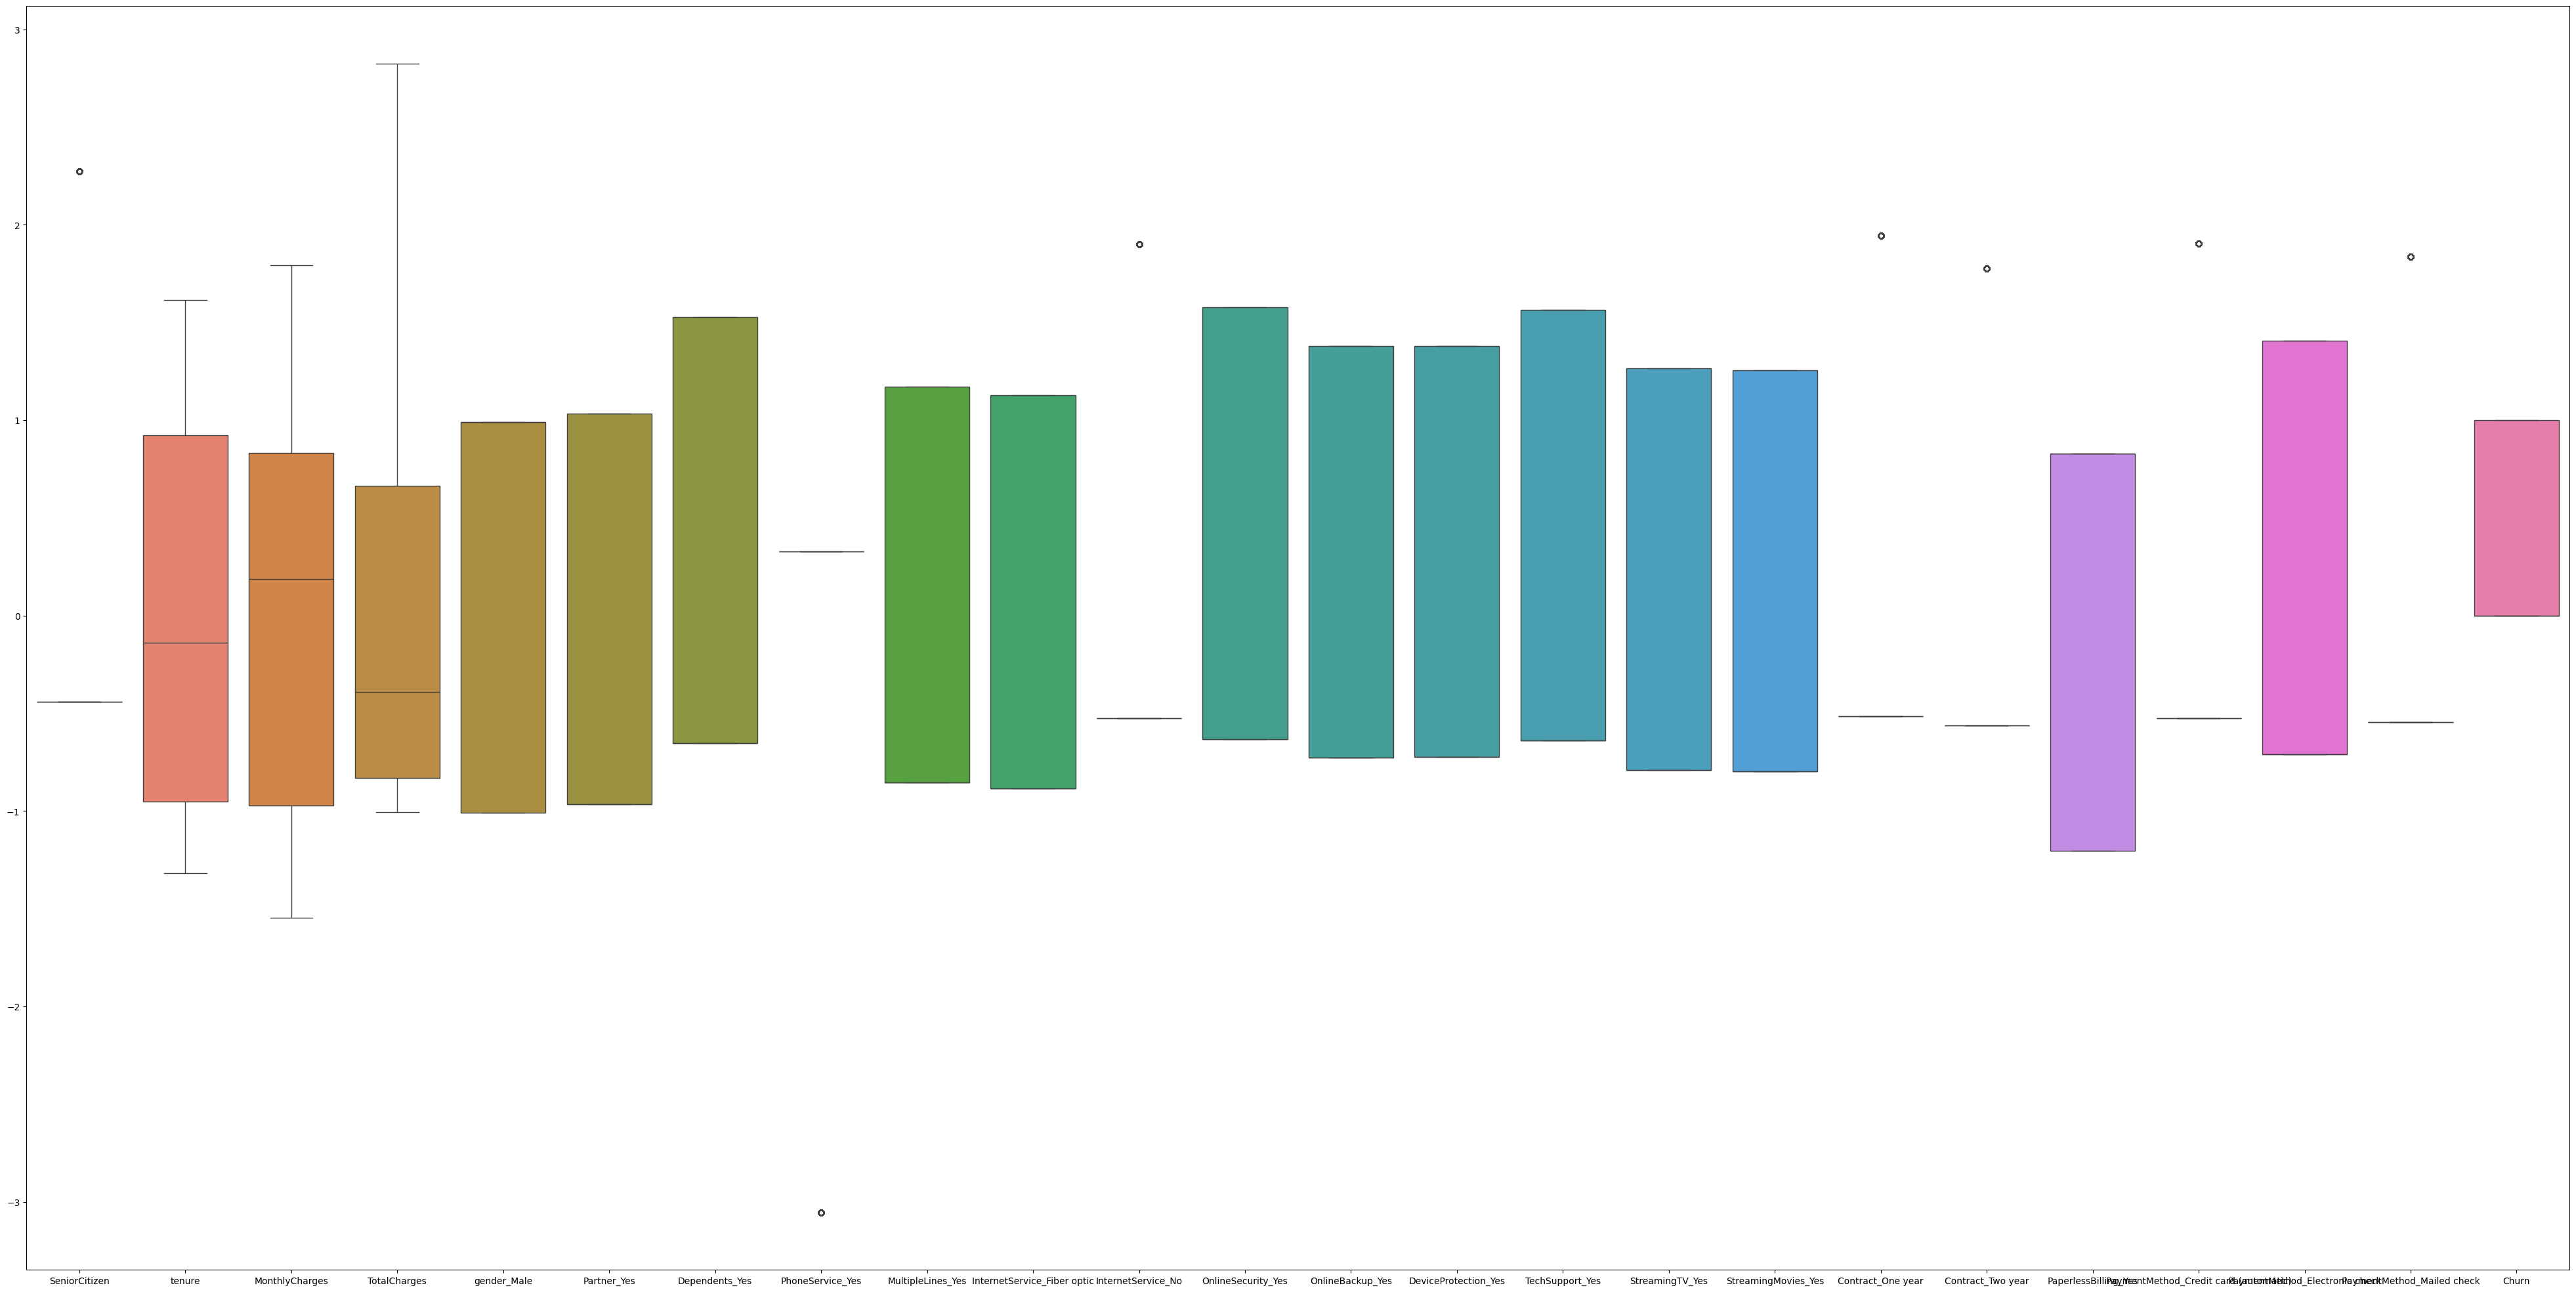

In [27]:
plt.figure(figsize=(50,25))
sns.boxplot(data=com_scaled_data_frame)
plt.show()

In [28]:
from sklearn.model_selection import train_test_split

XX = com_scaled_data_frame.drop(columns=["Churn"])

YY = com_scaled_data_frame["Churn"]

X_train, X_test, Y_train, Y_test = train_test_split(XX,YY,test_size=0.3,random_state=42)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(4930, 23) (2113, 23) (4930,) (2113,)


**RandomForestClassifier**

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_classifier = RandomForestClassifier(n_estimators=1000, random_state=42)

random_classifier.fit(X_train,Y_train)

Y_pred = random_classifier.predict(X_test)

accuracy_score = accuracy_score(Y_test, Y_pred)

accuracy_score

0.7993374349266446

Find Optimal Values for Random Forest Classifier Using GridSearch
**bold text**


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

search_model = RandomForestClassifier()

param_grid = {
    'n_estimators' :  [50, 100, 150, 200,500,1000],
    'max_depth' : [None, 10, 20, 30,40,50],
    'min_samples_split' : [2,5,10,15,20],
    'min_samples_leaf' : [1,2,4,5,6]

}


random_grid_search = GridSearchCV(estimator=search_model, param_grid=param_grid, cv=5,n_jobs=-1, verbose=2)

random_grid_search.fit(X_train, Y_train)

random_grid_search.best_params_

# Fitting 5 folds for each of 900 candidates, totalling 4500 fits
# {'max_depth': None,
#  'min_samples_leaf': 6,
#  'min_samples_split': 15,
#  'n_estimators': 100}

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


{'max_depth': None,
 'min_samples_leaf': 6,
 'min_samples_split': 15,
 'n_estimators': 100}

Use Optimal Random Grid Search values

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_classifier_ = RandomForestClassifier(n_estimators=100,max_depth=None,min_samples_leaf=6,min_samples_split=15,  random_state=42)

random_classifier_.fit(X_train,Y_train)

Y_pred = random_classifier_.predict(X_test)

accuracy_score = accuracy_score(Y_test, Y_pred)

accuracy_score

0.8045433033601515

Accuracy for Random Forest Classifier Increased from 0.7993374349266446 to 0.8045433033601515


**ADA BOOST CLASSIFIER**

In [36]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

ada_boost_classifier = AdaBoostClassifier(base_estimator = decision_tree_classifier, n_estimators = 100, random_state=42)

ada_boost_classifier.fit(X_train, Y_train)

Y_pred = ada_boost_classifier.predict(X_test)

decision_tree_accuracy_score = accuracy_score(Y_test, Y_pred)

decision_tree_accuracy_score

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.804070042593469

**Use RandomGridSearch to find optimal values:**

In [42]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

# Define the parameter grid
param_grid = {
    'base_estimator__max_depth': [1, 2, 3, 4,5],
    'n_estimators': [50, 100, 200,400,500],
    'learning_rate': [0.01, 0.1, 1]
}

# Initialize the AdaBoost classifier
ada_clf = AdaBoostClassifier(base_estimator=decision_tree_classifier, random_state=42)

# Initialize GridSearchCV
grid_search_dec_ = GridSearchCV(estimator=ada_clf, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

grid_search_dec_.fit(X_train, Y_train)

grid_search_dec_.best_params_

# {'base_estimator__max_depth': 1, 'learning_rate': 0.1, 'n_estimators': 400}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


{'base_estimator__max_depth': 1, 'learning_rate': 0.1, 'n_estimators': 400}

**Use Optimal Values**

In [43]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier


decision_tree_classifier = DecisionTreeClassifier(max_depth=1)

ada_boost_classifier = AdaBoostClassifier(base_estimator = decision_tree_classifier, n_estimators = 400,learning_rate= 0.1, random_state=42)

ada_boost_classifier.fit(X_train, Y_train)

Y_pred = ada_boost_classifier.predict(X_test)

decision_tree_accuracy_score = accuracy_score(Y_test, Y_pred)

decision_tree_accuracy_score

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.804070042593469

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

gradient_boost_classifier = GradientBoostingClassifier(n_estimators = 100, random_state=42)

gradient_boost_classifier.fit(X_train, Y_train)

Y_pred = gradient_boost_classifier.predict(X_test)

gradient_boost_accuracy_score = accuracy_score(Y_test, Y_pred)

gradient_boost_accuracy_score

0.8017037387600567

In [44]:
pip install xgboost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


xgb_classifier = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, random_state=42)

xgb_classifier.fit(X_train, Y_train)

Y_pred = xgb_classifier.predict(X_test)

xgb_classifier_accuracy_score = accuracy_score(Y_test, Y_pred)

xgb_classifier_accuracy_score


0.8050165641268339

**Use GridSearchCV to find optimal values**

In [45]:
from xgboost import XGBClassifier


xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize GridSearchCV
grid_search_xg_boost = GridSearchCV(estimator=xgb_clf, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

grid_search_xg_boost.fit(X_train, Y_train)

grid_search_xg_boost.best_params_


# {'colsample_bytree': 0.8,
#  'learning_rate': 0.1,
#  'max_depth': 3,
#  'n_estimators': 100,
#  'subsample': 0.6}

{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 0.6}

Use Optimal values for the XGBoost
**bold text**

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


xgb_classifier = XGBClassifier(
    colsample_bytree = 0.8,
 learning_rate= 0.1,
 max_depth= 3,
 n_estimators= 100,
 subsample= 0.6,
    random_state=42)

xgb_classifier.fit(X_train, Y_train)

Y_pred = xgb_classifier.predict(X_test)

xgb_classifier_accuracy_score = accuracy_score(Y_test, Y_pred)

xgb_classifier_accuracy_score


0.8102224325603408

Accuracy change from 0.8050165641268339
 to 0.8102224325603408 **bold text**


**LOGISTIC REGRESSION**

In [48]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression_model = logistic_regression.fit(X_train, Y_train)
logistic_Y_pred = logistic_regression_model.predict(X_test)

logistic_Y_pred


logistic_accuracy_score = accuracy_score(Y_test, logistic_Y_pred)

logistic_accuracy_score
# accuracy_score

0.8121154756270705

In [53]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the logistic regression classifier
log_reg = LogisticRegression(solver='liblinear')

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Initialize GridSearchCV
grid_search_logistic = GridSearchCV(estimator=log_reg, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV on the training data
grid_search_logistic.fit(X_train, Y_train)

# Get the best parameters and the best score
grid_search_logistic.best_params_
# best_score = grid_search.best_score_

{'C': 0.1, 'penalty': 'l2'}

In [56]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(C = 0.1, penalty='l2')
logistic_regression_model = logistic_regression.fit(X_train, Y_train)
logistic_Y_pred_ = logistic_regression_model.predict(X_test)

logistic_Y_pred_


logistic_accuracy_score_ = accuracy_score(Y_test, logistic_Y_pred_)

logistic_accuracy_score_
# accuracy_score

0.8116422148603881